In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, stats

In [2]:
df = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Данные')
df['dtime_pay'] = pd.to_datetime(df['dtime_pay'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df = df.dropna(subset = ['id_client']) # Удаляем пустые заказы, так как их нельзя соотнести ни к какой группе
df = df.fillna(0)  # Заменяем отсутствующие данные на 0, так как эти незавершенные заказы имеют значение в проводимом тесте

df_cl = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Clients')
#df = df.dropna(how='any')
df_cl = df_cl.fillna(0) # Оставляем строки со значениями НАН и заменяем их на 0, так как эти строки имеют значение в проводимом тесте.

df_reg = pd.read_excel('Новый диплом датасет.xlsx', sheet_name = 'Region_dict')

In [3]:
df_reg_grouped = df_reg.groupby('city')['id_trading_point'].count().reset_index()


C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\2688697273.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_reg_grouped['city'], fontweight='bold')


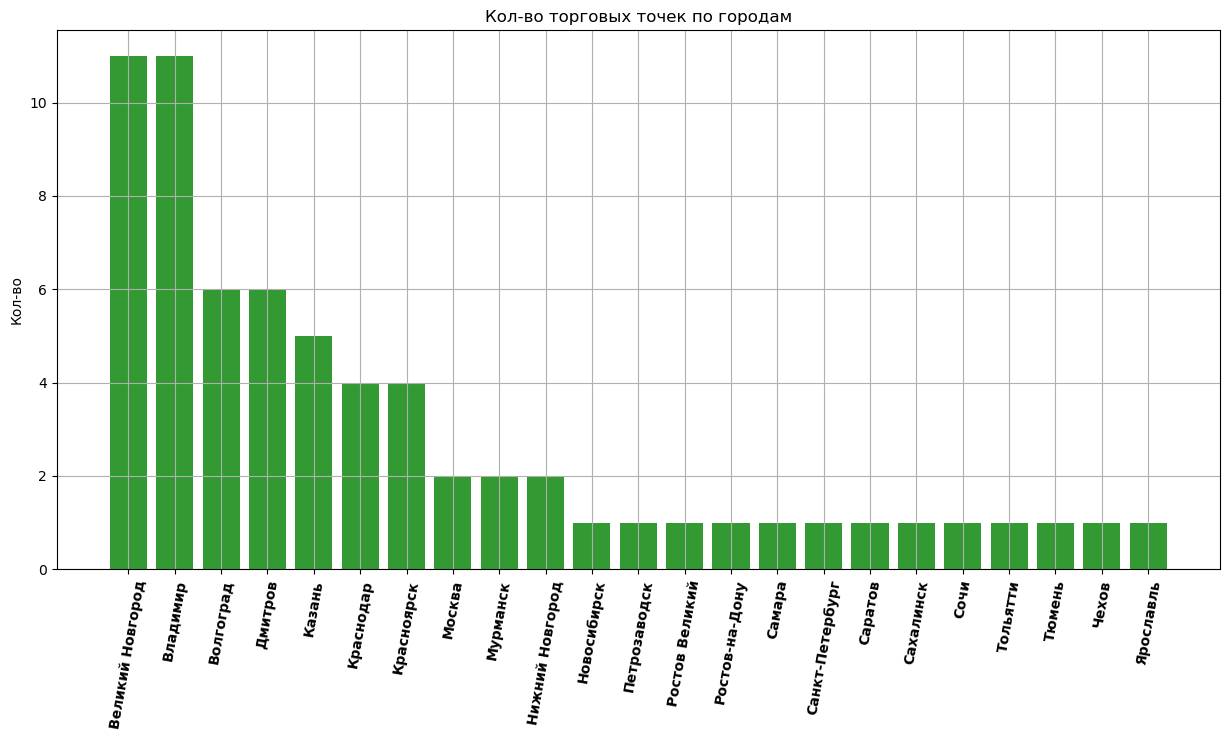

In [4]:
df_reg_grouped_sorted = df_reg_grouped.sort_values(by = 'id_trading_point', ascending=False)

ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

ax.bar(df_reg_grouped_sorted['city'],df_reg_grouped_sorted['id_trading_point'], color = 'green', alpha = .8)
ax.set_title("Кол-во торговых точек по городам")
ax.set_ylabel('Кол-во')
plt.xticks(rotation=80)
ax.set_xticklabels(df_reg_grouped['city'], fontweight='bold')
ax.grid()
plt.show()

In [ ]:
________________________________________________________________________________________________________________________________


In [5]:
df_grouped = df.groupby('id_client')['amt_payment'].sum().reset_index()
df_grouped

,id_client,amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178564.0,0.0
4,178565.0,958.0
...,...,...
29707,209630.0,6927.0
29708,209631.0,2090.0
29709,209632.0,2775.0
29710,209633.0,1673.0


In [6]:
df_cl_plus = pd.merge(df_cl, df_grouped)
df_cl_plus = pd.merge(df_cl_plus, df_reg)
df_cl_plus['payment_flag'] = (df_cl_plus['amt_payment'] > 0).astype(int)
df_cl_plus

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,payment_flag
0,180844,2022-06-08 18:38:41.414000,0,212,5349.0,Красноярск,1
1,201715,2022-07-30 19:07:49.264000,1,212,4171.0,Красноярск,1
2,190438,2022-07-02 12:53:04.753000,1,212,6026.0,Красноярск,1
3,197981,2022-07-21 10:21:58.067000,1,212,8923.0,Красноярск,1
4,193994,2022-07-11 10:20:45.889000,1,212,877.0,Красноярск,1
...,...,...,...,...,...,...,...
29707,184085,0,0,7,0.0,Ростов Великий,0
29708,190407,0,1,7,0.0,Ростов Великий,0
29709,191938,0,0,7,0.0,Ростов Великий,0
29710,203842,0,1,7,0.0,Ростов Великий,0


In [ ]:
________________________________________________________________________________________________________________________________

In [28]:
def test_calc (r1, r2, alpha= 0.05):
    
    s, p = ttest_ind(r1, r2)
    
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
        
    return s, p

In [29]:
def mann_whitney_func(r1, r2, alpha= 0.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p<alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
        
    return s, p

In [ ]:
________________________________________________________________________________________________________________________________


In [9]:
lst = []



for i in df_cl_plus['id_trading_point'].unique():

    

    filtered_df = df_cl_plus[df_cl_plus['id_trading_point']==i]

    sum_a = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==0)].sum()['amt_payment'].sum()

    sum_b = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==1)].sum()['amt_payment'].sum()

    if (sum_a == 0) | (sum_b == 0):

        lst.append(i)
lst

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:13: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWar

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:13: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWar

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:13: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = filtered_df[(filtered_df['id_trading_point']==i) & (filtered_df['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\565642931.py:11: FutureWar

[739, 866, 46, 228, 26, 1015, 810, 1099, 800, 603, 4, 1, 7]

In [ ]:
________________________________________________________________________________________________________________________________


In [10]:
lst_drop = lst
df_cl_plus = df_cl_plus[~df_cl_plus['id_trading_point'].isin(lst_drop)]

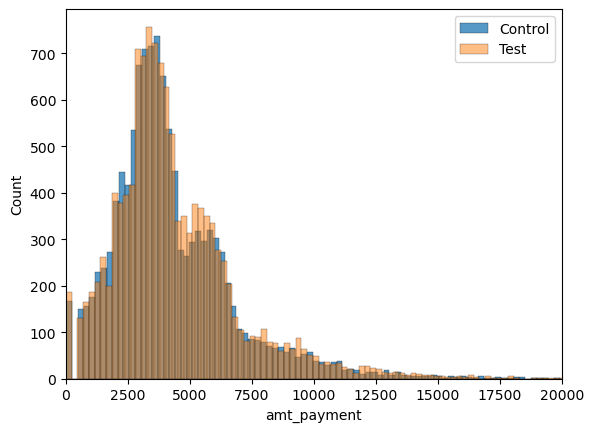

In [11]:
df_cl_plus0 = df_cl_plus[~df_cl_plus['nflag_test'].isin([1])]
df_cl_plus1 = df_cl_plus[~df_cl_plus['nflag_test'].isin([0])]
sns.histplot(df_cl_plus0['amt_payment'], label = 'Control')
sns.histplot(df_cl_plus1['amt_payment'],alpha = .5, label = 'Test')
plt.xlim(xmin=0, xmax=20000)
plt.legend(loc = 'best')
plt.show()

In [31]:
d1 = df_cl_plus0['amt_payment']
d2 = df_cl_plus1['amt_payment']

In [38]:
test_calc(d2,d1)

Распределения не равны


(3.710416120801964, 0.00020738175805752658)

In [33]:
mann_whitney_func(d2,d1)

Распределения не равны


(75386649.0, 4.7855802668461206e-05)

In [34]:
d3 = df_cl_plus0['payment_flag']
d4 = df_cl_plus1['payment_flag']

In [35]:
test_calc(d4,d3)

Распределения равны


(-0.40908402801206456, 0.6824816164255584)

In [36]:
mann_whitney_func(d4,d3)

Распределения равны


(73131205.0, 0.6824760862304036)

In [29]:
# Оба теста (Т тест и тест Манна Уитни) показывают немного разные результаты (как и должно быть), но в рамках допустимых норм, 
# оба теста равнозначны.
# Проведя тест по средним платежам мы наблюдаем статистическую разницу, что подтверждает гипотизу Н1
# Проведя тест по наличию оплат мы не наблюдаем статистической разници, что подтверждает гипотизу Н0

In [ ]:
________________________________________________________________________________________________________________________________


In [18]:
def plot_segment_distribution (df, segment_columns, test_group):
    for s in segment_columns:
        agg_data = df.groupby(by = [test_group, s]).id_client.count().reset_index()
        colors = ['blue', 'purple']
        sns.catplot(x = s, y = 'id_client', hue = test_group, data = agg_data, kind = 'bar', height = 7, aspect = 2, palette = colors)
        plt.xticks(rotation=55)
        plt.grid()
        plt.title("Сплитование групп Контроль\Тест по городам")
    

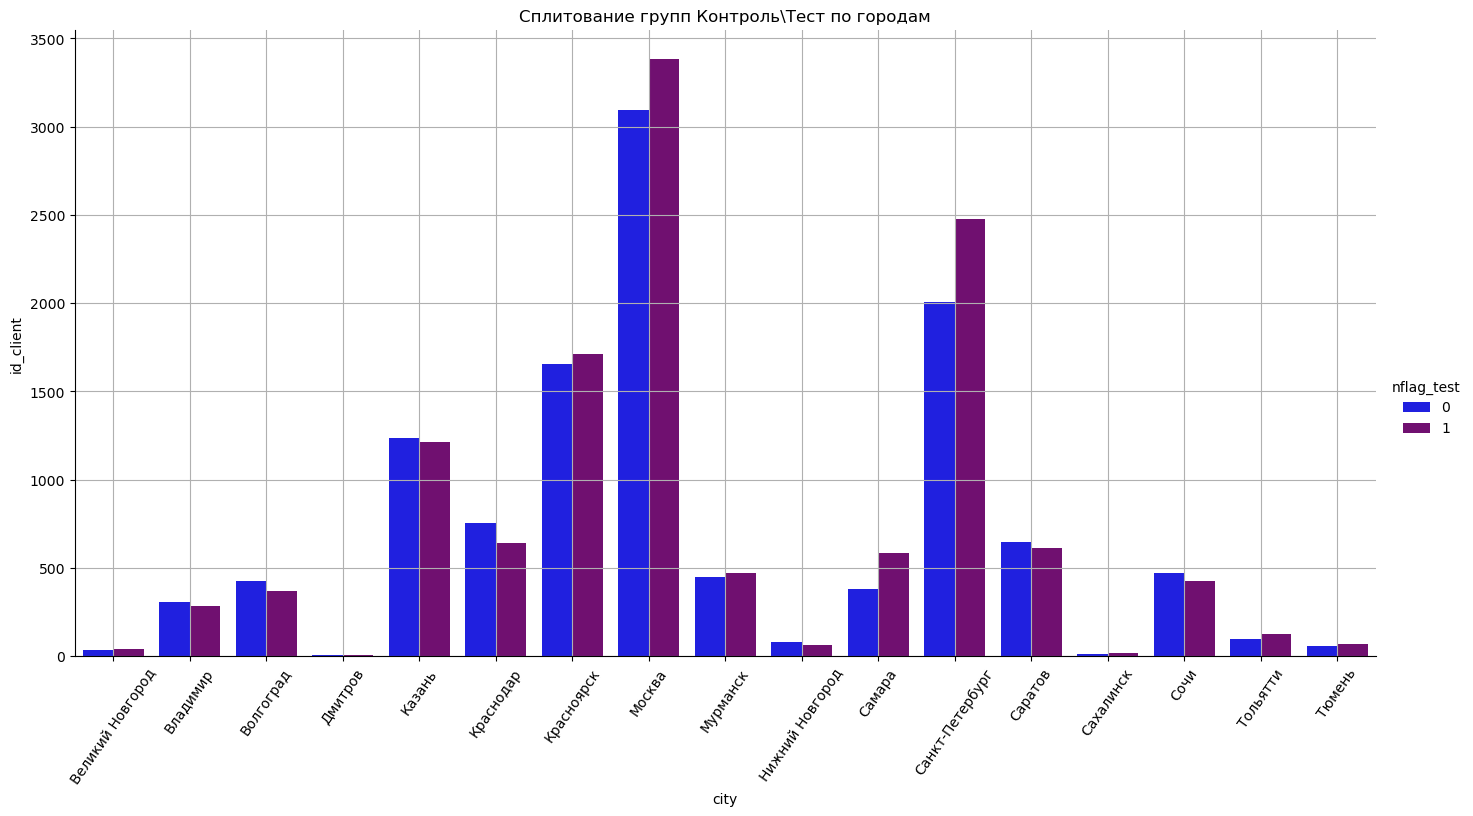

In [19]:
plot_segment_distribution(df_cl_plus, ['city'], 'nflag_test')

In [20]:
ttest_lst = []
unique_citys = df_cl_plus['city'].unique()

for i in unique_citys:
    
    filtered_df0 = df_cl_plus[df_cl_plus['nflag_test'].isin([0]) & df_cl_plus['city'].isin([i])]
    filtered_df1 = df_cl_plus[df_cl_plus['nflag_test'].isin([1]) & df_cl_plus['city'].isin([i])]
    
    da = filtered_df0['amt_payment']
    db = filtered_df1['amt_payment']

    dc = filtered_df0['payment_flag']
    dd = filtered_df1['payment_flag']
    
    ttest_lst.append([i, test_calc(db,da)])
    
    print("\033[1m" + i + ":")    
    print("\033[0m")
    print('Payments T-test:')
    print(test_calc(db,da))
    print(' ')
    print('Payments M.W.-test:')
    print(mann_whitney_func(db,da))
    print(' ')
    print('&')
    print(' ')
    print('Payments Flag T-test:')
    print(test_calc(dd,dc))
    print(' ')
    print('Payments Flag M.W.-test:')
    print(mann_whitney_func(dd,dc))
    
    print("\033[1m" + '---------------------------------------------------')



ttest_df = pd.DataFrame(ttest_lst, columns=['City', 'Values'])
ttest_df[['ttest', 'pvalue']] = pd.DataFrame(ttest_df['Values'].tolist(), index=ttest_df.index)
ttest_df.drop(columns=['Values'], inplace=True)


Распределения равны
Красноярск:

Payments T-test:
Распределения равны
(0.726532391959767, 0.4675629765213105)
 
Payments M.W.-test:
Распределения равны
(1429270.0, 0.6759750403460492)
 
&
 
Payments Flag T-test:
Распределения равны
(1.0124287370730132, 0.3114058730353475)
 
Payments Flag M.W.-test:
Распределения равны
(1423220.0, 0.3113770370473682)
---------------------------------------------------
Распределения равны
Нижний Новгород:

Payments T-test:
Распределения равны
(-0.022987969749103238, 0.9816921408066424)
 
Payments M.W.-test:
Распределения равны
(2550.0, 0.9695329363017403)
 
&
 
Payments Flag T-test:
Распределения равны
(-1.119019475048544, 0.2650211760536831)
 
Payments Flag M.W.-test:
Распределения равны
(2520.0, 0.2695677341982424)
---------------------------------------------------
Распределения равны
Казань:

Payments T-test:
Распределения равны
(1.21602625005776, 0.22409221464866502)
 
Payments M.W.-test:
Распределения равны
(780233.5, 0.0800492061132593)
 
&
 
Paym

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\3262033602.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s, p = ttest_ind(r1, r2)


In [21]:
ttest_df

,City,ttest,pvalue
0,Красноярск,0.726532,4.675630e-01
1,Нижний Новгород,-0.022988,9.816921e-01
2,Казань,1.216026,2.240922e-01
3,Москва,5.139276,2.838764e-07
4,Санкт-Петербург,1.860169,6.292709e-02
5,Мурманск,-1.384363,1.665838e-01
6,Самара,3.917878,9.563604e-05
7,Краснодар,-0.529163,5.967770e-01
8,Волгоград,-1.467059,1.427559e-01
9,Тольятти,0.612180,5.410507e-01


In [ ]:
# Москва и Питер показывают противоположные резултаты по всем тестам. В Москве во всех случаях наблюдается статистическая 
# разници, что подтверждает гипотизу Н1, в то время как в Питере статистической разницы нет в тестах и побеждает гипотиза Н0

In [ ]:
________________________________________________________________________________________________________________________________


In [39]:
columns = ['city', 'id_trading_point', 'count_test', 'count_control', 'count_all', 'percent_count',
           'avg_payment_test', 'avg_payment_control', 'diff', 'sigma_test', 'sigma_control',
           'ttest', 'pvalue_ttest', 'outcome_flag']

id_trading_point_to_city = df_cl_plus[['id_trading_point', 'city']].drop_duplicates().set_index('id_trading_point')['city'].to_dict()

result_df = pd.DataFrame(columns=columns)

unique_trading_points = df_cl_plus['id_trading_point'].unique()

for i in unique_trading_points: 
    d1 = df_cl_plus[(df_cl_plus['nflag_test'] == 0) & (df_cl_plus['id_trading_point'] == i)]['amt_payment']
    d2 = df_cl_plus[(df_cl_plus['nflag_test'] == 1) & (df_cl_plus['id_trading_point'] == i)]['amt_payment']
    ttest = ttest_ind(d2,d1)
    result_df = result_df.append({'id_trading_point': i, 
    'count_test' : df_cl_plus[(df_cl_plus['nflag_test'] == 1) & (df_cl_plus['id_trading_point'] == i)]['id_trading_point'].count(),
    'count_control' : df_cl_plus[(df_cl_plus['nflag_test']== 0) & (df_cl_plus['id_trading_point'] == i)]['id_trading_point'].count(),
    'city': id_trading_point_to_city.get(i, ''),  
    'avg_payment_test' : (df_cl_plus[(df_cl_plus['nflag_test'] == 1) & (df_cl_plus['id_trading_point'] == i)]['amt_payment'].mean()).round(2),    
    'avg_payment_control' : (df_cl_plus[(df_cl_plus['nflag_test'] == 0) & (df_cl_plus['id_trading_point'] == i)]['amt_payment'].mean()).round(2),
    'sigma_test' : (df_cl_plus[(df_cl_plus['nflag_test'] == 1) & (df_cl_plus['id_trading_point'] == i)]['amt_payment']).std(),
    'sigma_control' : (df_cl_plus[(df_cl_plus['nflag_test'] == 0) & (df_cl_plus['id_trading_point'] == i)]['amt_payment']).std(),
    'ttest' : ttest[0],
    'pvalue_ttest' : ttest[1]                             
    }, ignore_index=True)
    
    
result_df['count_all'] = result_df['count_test'] + result_df['count_control']

grouped_by_city = result_df.groupby('city')
total_counts_by_city = grouped_by_city['count_all'].transform('sum')
result_df['percent_count'] = result_df['count_all'] / total_counts_by_city

result_df['diff'] = result_df['avg_payment_test'] - result_df['avg_payment_control'] 


result_df['sigma_test'] = round(result_df['sigma_test'], 2)
result_df['sigma_control'] = round(result_df['sigma_control'], 2)


result_df.loc[(result_df['diff'] > 0) & (result_df['pvalue_ttest'] <= 0.05), 'outcome_flag'] = 'Положительный исход'
result_df.loc[(result_df['diff'] < 0) & (result_df['pvalue_ttest'] <= 0.05), 'outcome_flag'] = 'Отрицательный исход'    
result_df.loc[result_df['pvalue_ttest'] >= 0.05, 'outcome_flag'] = 'Нейтральный исход'  

result_df = result_df.sort_values(by='city')
result_df    

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id

C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id_trading_point': i,
C:\Users\vladi\AppData\Local\Temp\ipykernel_23664\515638804.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'id

,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,outcome_flag
47,Великий Новгород,23,38,36,74,1.0,4518.26,3911.39,606.87,2401.65,2117.65,1.150469,2.537575e-01,Нейтральный исход
24,Владимир,11,286,306,592,1.0,4533.34,4189.66,343.68,2694.67,2316.53,1.667256,9.599418e-02,Нейтральный исход
13,Волгоград,66,371,425,796,1.0,4053.34,4303.62,-250.28,2363.75,2433.19,-1.467059,1.427559e-01,Нейтральный исход
49,Дмитров,2,9,7,16,1.0,5020.89,4903.57,117.32,2870.16,2581.77,0.084644,9.337427e-01,Нейтральный исход
2,Казань,991,144,141,285,0.116374,6092.40,5114.74,977.66,4945.56,3731.73,1.880901,6.101207e-02,Нейтральный исход
6,Казань,544,183,184,367,0.149857,5400.43,5958.63,-558.20,3663.41,5376.89,-1.161609,2.461534e-01,Нейтральный исход
37,Казань,439,156,161,317,0.129441,5648.05,5233.68,414.37,4391.69,3922.50,0.886624,3.759578e-01,Нейтральный исход
39,Казань,477,167,172,339,0.138424,5168.72,5603.70,-434.98,3565.69,4051.96,-1.048126,2.953315e-01,Нейтральный исход
10,Казань,699,211,237,448,0.182932,5533.37,5365.95,167.42,4202.77,4447.43,0.408143,6.833643e-01,Нейтральный исход
21,Казань,516,350,343,693,0.282973,5878.45,5341.07,537.38,4681.11,3728.73,1.669460,9.547912e-02,Нейтральный исход


In [40]:
positive_outcome_df = result_df[result_df['outcome_flag'] == 'Положительный исход']
negative_outcome_df = result_df[result_df['outcome_flag'] == 'Отрицательный исход']
netral_outcome_df = result_df[result_df['outcome_flag'] == 'Нейтральный исход']


excel_file_path = 'C:/Users/vladi/Downloads/Дипломка.xlsx' 


with pd.ExcelWriter(excel_file_path) as writer:
    
     positive_outcome_df.to_excel(writer, sheet_name='Положительный исход', index=False)
     negative_outcome_df.to_excel(writer, sheet_name='Отрицательный исход', index=False)
     netral_outcome_df.to_excel(writer, sheet_name='Нейтральный исход', index=False)

print(f'Результаты сохранены в файл {excel_file_path}')



Результаты сохранены в файл C:/Users/vladi/Downloads/Дипломка.xlsx
